ANTRACT Dataset :  Evaluation
===============================

This notebook serves as evaluation for the face recognition system.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
from sklearn.metrics import precision_recall_fscore_support as score


from src import clusterize

In [2]:
model_names = { # for the discrepancies for the model names and the dataset ones
    'Gaulle, Charles de'           : 'Charles De Gaulle',
    'Auriol, Vincent'              : 'Vincent Auriol',
    'Pompidou, Georges'            : 'Georges Pompidou',
    'Bidault, Georges'             : 'Georges Bidault',
    'Eisenhower, Dwight David'     : 'Dwight Eisenhower',
    'Eisenhower, Dwight'           : 'Dwight Eisenhower',
    'Khrouchtchev, Nikita'         : 'Nikita Khrouchtchev',
    'Mollet, Guy'                  : 'Guy Mollet',
    'Adenauer, Konrad'             : 'Konrad Adenauer',
    'Molotov, Viatcheslav'         : 'Viatcheslav Molotov',
    'Mendès France, Pierre'        : 'Pierre Mendès France',
    "Elizabeth d'Angleterre"       : 'Elisabeth II',
    'Mitterrand, François'         : 'François Mitterrand',
    'Ben Bella, Ahmed'             : 'Ahmed Ben Bella',
    '0'                            : '0'
}

Load the original dataset

In [3]:
df_dataset = pd.read_csv('dataset_antract.csv')
df_dataset

,media,url,segment,start,end,person
0,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,263,265,"Ben Bella, Ahmed"
1,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,270,272,"Ben Bella, Ahmed"
2,http://www.ina.fr/media/AFE86003847,/Media/AF/AFE86003847.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,185,188,"Ben Bella, Ahmed"
3,http://www.ina.fr/media/AFE86003840,/Media/AF/AFE86003840.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,54,57,"Ben Bella, Ahmed"
4,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,255,256,"Ben Bella, Ahmed"
...,...,...,...,...,...,...
211,http://www.ina.fr/media/AFE86004878,/Media/AF/AFE86004878.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,506,509,0
212,http://www.ina.fr/media/AFE86004740,/Media/AF/AFE86004740.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,109,112,0
213,http://www.ina.fr/media/AFE86004580,/Media/AF/AFE86004580.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,194,196,0
214,http://www.ina.fr/media/AFE86004419,/Media/AF/AFE86004419.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,677,678,0


In [4]:
len(df_dataset['segment'].unique())

198

Load computation results (obtained using `bulk_run.py`)

In [5]:
with open('./intermediate/results_antract.json', 'r') as f:
    results = json.load(f)
len(results)

216

In [6]:
clusters = [clusterize.main(clusterize.from_dict(p), confidence_threshold=0.0) for p in results]

In [7]:
l = len(df_dataset)
df_dataset['predicted'] = np.zeros(l)
df_dataset['confidence'] = np.zeros(l)

for i, x in df_dataset.iterrows():
    cur = clusters[i]
    start = x['start']
    end = x['end']
    b = np.arange(start, end)
    found = False
    for c in cur:
        a = np.arange(c['start_npt'], c['end_npt'])
        if len(np.intersect1d(a,b)) > 0:
            df_dataset.loc[i, 'predicted'] = c['name']
            df_dataset.loc[i, 'confidence'] = c['confidence']
            if x['person'] == c['name']:
                break

df_dataset

,media,url,segment,start,end,person,predicted,confidence
0,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,263,265,"Ben Bella, Ahmed",Ahmed Ben Bella,0.907584
1,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,270,272,"Ben Bella, Ahmed",Ahmed Ben Bella,0.760531
2,http://www.ina.fr/media/AFE86003847,/Media/AF/AFE86003847.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,185,188,"Ben Bella, Ahmed",Ahmed Ben Bella,0.750289
3,http://www.ina.fr/media/AFE86003840,/Media/AF/AFE86003840.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,54,57,"Ben Bella, Ahmed",0.0,0.000000
4,http://www.ina.fr/media/AFE86003905,/Media/AF/AFE86003905.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86003...,255,256,"Ben Bella, Ahmed",0.0,0.000000
...,...,...,...,...,...,...,...,...
211,http://www.ina.fr/media/AFE86004878,/Media/AF/AFE86004878.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,506,509,0,0.0,0.000000
212,http://www.ina.fr/media/AFE86004740,/Media/AF/AFE86004740.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,109,112,0,0.0,0.000000
213,http://www.ina.fr/media/AFE86004580,/Media/AF/AFE86004580.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,194,196,0,0.0,0.000000
214,http://www.ina.fr/media/AFE86004419,/Media/AF/AFE86004419.mp4,http://www.campus-AAR.fr/sceneSegment_AFE86004...,677,678,0,Nikita Khrouchtchev,0.780162


In [8]:
df_dataset['label'] = df_dataset['person'].apply(lambda x: model_names[str(x)])

In [9]:
classes = [str(p) for p in df_dataset['label'].unique()]

def compute_metrics(threshold=0.5):
    label = np.array([str(p) for p in df_dataset['label']])
    predicted = np.array([str(p['predicted']) if p['confidence'] > threshold else '0' for i, p in df_dataset.iterrows() ])
    
    return score(label, predicted, labels=classes, zero_division=1)

def show_metrics(threshold=0.5):
    precision , recall, fscore, support = compute_metrics(threshold)
    
    dfx = pd.DataFrame()
    dfx['index']= classes
    dfx['precision'] =  precision
    dfx['recall'] =  recall
    dfx['fscore'] =  fscore
    dfx['support'] =  support

    tot = {
        'index' : 'tot (excluded 0)',
        'precision': np.average(precision[0:-1], weights=support[0:-1]),
        'recall' : np.average(recall[0:-1], weights=support[0:-1]),
        'fscore' : np.average(fscore[0:-1], weights=support[0:-1]),
        'support' : np.sum(support)
    }
    dfx = dfx.append(pd.DataFrame(tot, index=[7]))
    return dfx

In [10]:
widgets.interact(show_metrics, threshold=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.60));

interactive(children=(FloatSlider(value=0.6, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [11]:
precision =[]
recall =[]
fscore =[]

_range = np.arange(0, 0.8, 0.05)
for threshold in _range:
    p, r, f, support = compute_metrics(threshold)
    precision.append(np.average(p[0:-1], weights=support[0:-1]))
    recall.append(np.average(r[0:-1], weights=support[0:-1]))
    fscore.append(np.average(f[0:-1], weights=support[0:-1]))

In [12]:
np.argmax(fscore) * 0.05

0.5

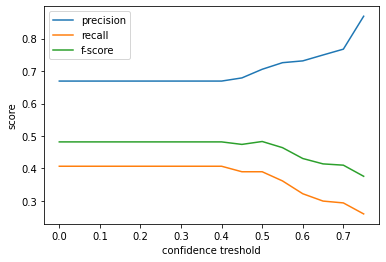

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(_range, precision, label='precision')  # Plot some data on the axes.
ax.plot(_range, recall, label='recall')  # Plot more data on the axes...
ax.plot(_range, fscore, label='f-score')  # ... and some more.
ax.set_xlabel('confidence treshold')  # Add an x-label to the axes.
ax.set_ylabel('score')  # Add a y-label to the axes.
ax.legend()  # Add a legend
plt.savefig('plot/antract_facerec_precision.pdf')  

0.5 looks like the best threshold

In [14]:
show_metrics(0.5)

,index,precision,recall,fscore,support
0,Ahmed Ben Bella,0.700000,0.538462,0.608696,13
1,François Mitterrand,1.000000,0.384615,0.555556,13
2,Pierre Mendès France,1.000000,0.153846,0.266667,13
3,Guy Mollet,0.800000,0.615385,0.695652,13
4,Georges Bidault,0.300000,0.214286,0.250000,14
5,Charles De Gaulle,0.692308,0.473684,0.562500,19
6,Nikita Khrouchtchev,0.400000,0.153846,0.222222,13
7,Vincent Auriol,0.777778,0.538462,0.636364,13
8,Konrad Adenauer,0.666667,0.461538,0.545455,13
9,Dwight Eisenhower,0.666667,0.307692,0.421053,13


In [15]:
with open('plot/latex_antract.txt', 'w') as f:
    show_metrics(0.6).to_latex(f, index=False)

In [18]:
with open('queries/antract_year_by_media.rq', 'r') as f:
    query = f.read()

In [22]:
from SPARQLWrapper import SPARQLWrapper, JSON

ENDPOINT = "https://okapi.ina.fr/antract/api/saphir/sparql_search"
sparql = SPARQLWrapper(ENDPOINT)
sparql.setReturnFormat(JSON)

In [38]:
def get_year(media):
    q = query.replace('?media', f"<{media}>")
    sparql.setQuery(q)
    results = sparql.query().convert()["results"]["bindings"]
    date = results[0]['date']['value']
    return int(date[0:4])

df_dataset["year"] = df_dataset["media"].apply(get_year)

In [39]:
def filter_by(prop):
    def filter_with(what):
        return df_dataset[df_dataset[prop] == what]
    return filter_with
    
widgets.interact(filter_by('label'), what=widgets.Dropdown(
    options=df_dataset['label'].unique(),
    description='Person:',
));

interactive(children=(Dropdown(description='Person:', options=('Ahmed Ben Bella', 'François Mitterrand', 'Pier…

In [40]:
for x in df_dataset['label'].unique():
    d = filter_by('label')(x)
    print('- %s : %2.f' % (x, d["year"].mean()))

- Ahmed Ben Bella : 1962
- François Mitterrand : 1961
- Pierre Mendès France : 1958
- Guy Mollet : 1956
- Georges Bidault : 1950
- Charles De Gaulle : 1962
- Nikita Khrouchtchev : 1959
- Vincent Auriol : 1953
- Konrad Adenauer : 1959
- Dwight Eisenhower : 1953
- Elisabeth II : 1948
- Viatcheslav Molotov : 1951
- Georges Pompidou : 1965
- 0 : 1957
